In [1]:
import warnings

warnings.filterwarnings("ignore")
from pathlib import Path
import pandas as pd
from estival.sampling import tools as esamp
from tbdynamics.calibration.utils import (
    plot_output_ranges,
    plot_post_prior_comparison,
    tabulate_calib_results,
    plot_trace,
)
from tbdynamics.inputs import load_targets
from tbdynamics.constants import params_name
import arviz as az
from tbdynamics.calibration.utils import get_bcm

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
OUT_PATH = Path.cwd() / 'runs/r1308'
quantiles = [0.025, 0.25, 0.5, 0.75, 0.975]
spaghetti = pd.read_hdf(OUT_PATH / 'results.hdf', 'spaghetti')
quantile_outputs = esamp.quantiles_for_results(spaghetti, quantiles)
targets = load_targets()

In [3]:
plot_output_ranges(quantile_outputs,targets, ['total_population','notification','adults_prevalence_pulmonary'], quantiles, 1, 2010, 2025)

In [4]:
plot_output_ranges(quantile_outputs,targets, ['prevalence_smear_positive'], quantiles, 1, 2000, 2025)

In [5]:
plot_output_ranges(quantile_outputs,targets, ['incidence'], quantiles, 1, 2010, 2025)

In [6]:
plot_output_ranges(quantile_outputs,targets, ['mortality_raw'], quantiles, 1, 2005, 2025)

In [7]:
idata = az.from_netcdf(OUT_PATH / 'calib_full_out.nc')

In [8]:
# idata = idata.sel(draw=slice(50000,150000))

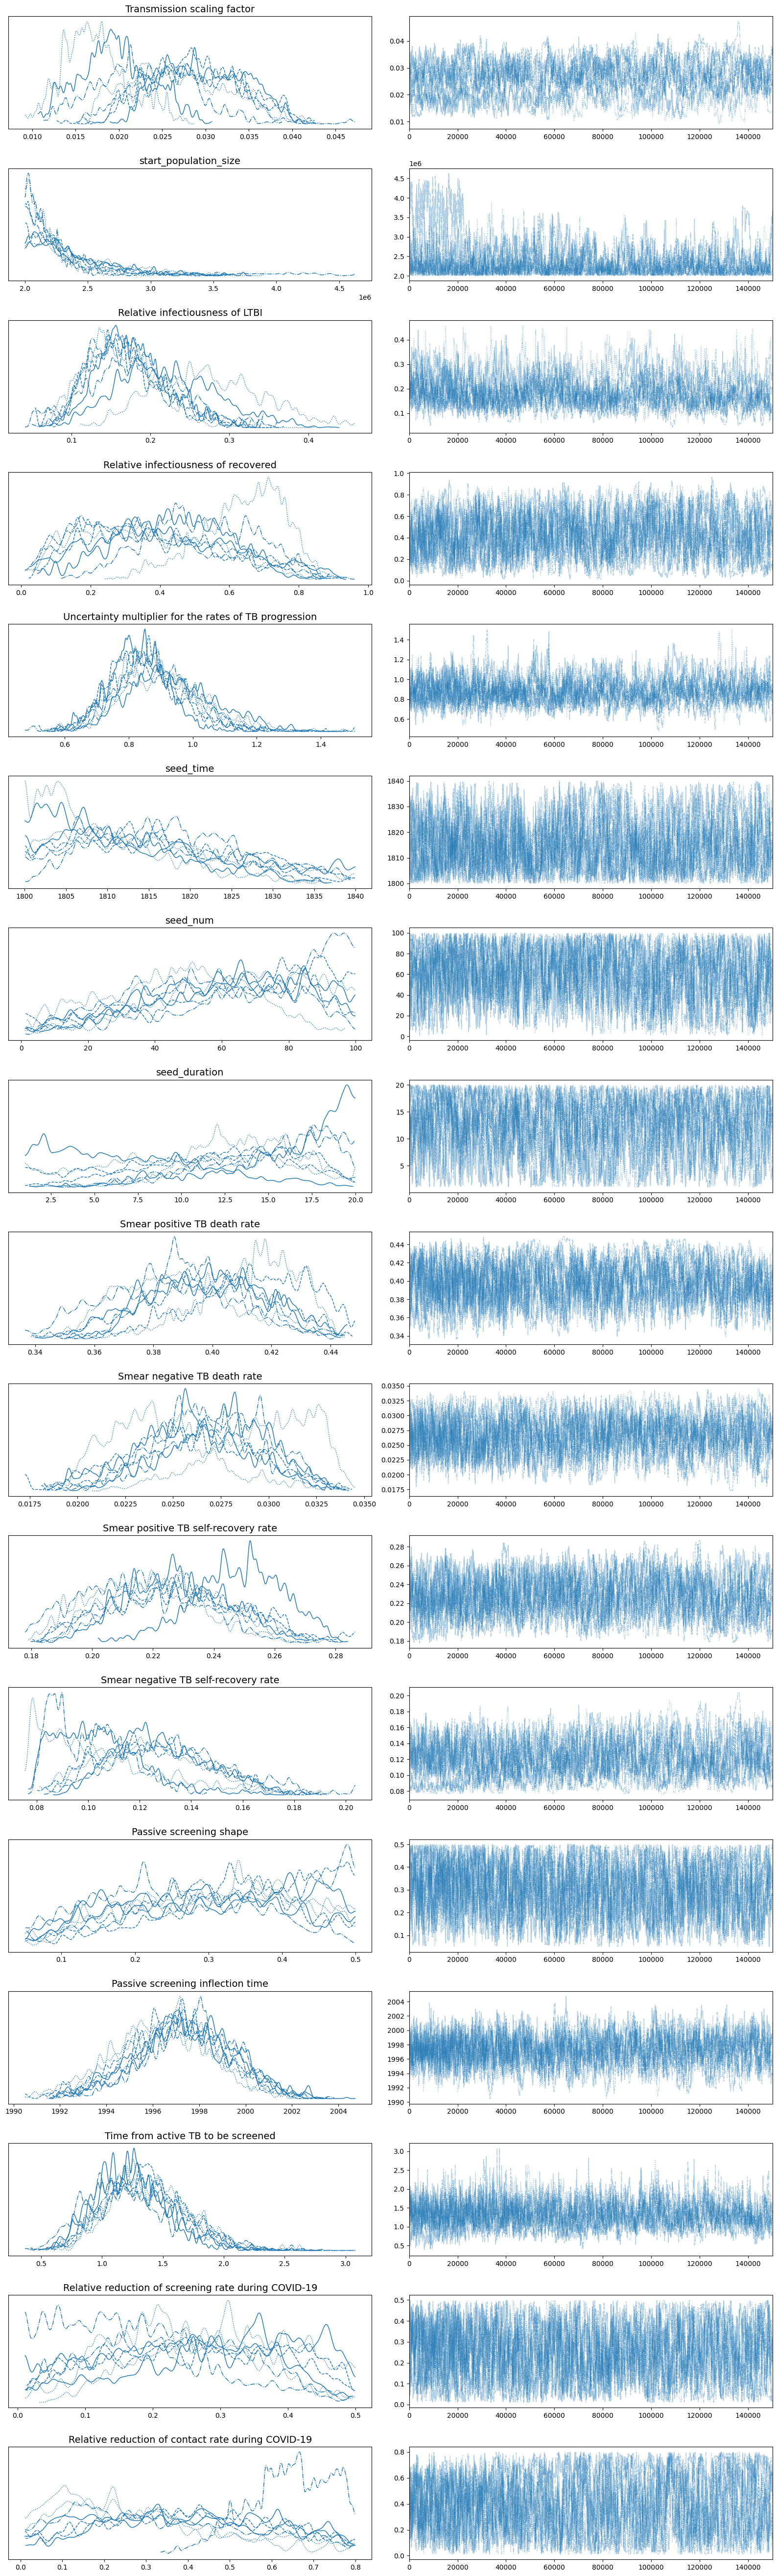

In [9]:
plot_trace(idata, params_name)

In [10]:
params = {
    "start_population_size": 2100000.0,
    "seed_time": 1820.0,
    "seed_num": 90.0,
    "seed_duration": 15.0,
}

In [11]:
priors = get_bcm(params).priors
# req_vars = list(priors.keys())

In [12]:
az.summary(idata)

mean          sd       hdi_3%  \
contact_rate                        0.025       0.007        0.013   
start_population_size         2326202.034  353132.760  2000199.975   
rr_infection_latent                 0.190       0.065        0.077   
rr_infection_recovered              0.436       0.203        0.080   
progression_multiplier              0.879       0.126        0.646   
seed_time                        1814.363       9.479     1800.008   
seed_num                           60.205      24.250       18.346   
seed_duration                      12.513       4.915        3.504   
smear_positive_death_rate           0.399       0.022        0.360   
smear_negative_death_rate           0.027       0.003        0.021   
smear_positive_self_recovery        0.227       0.021        0.189   
smear_negative_self_recovery        0.118       0.023        0.078   
screening_scaleup_shape             0.306       0.114        0.119   
screening_inflection_time        1997.084       2.089     1993.200   
time_to_screening_end_asymp         1.318       0.335        0.742   
detection_reduction                 0.249       0.123        0.033   
contact_reduction                   0.392       0.216        0.043   
notif_dispersion                10755.456    2862.788     5910.793   
prev_dispersion                    45.356      13.282       22.054   
sptb_dispersion                    17.355       5.829        7.659   

                                  hdi_97%  mcse_mean    mcse_sd  ess_bulk  \
contact_rate                        0.037      0.002      0.001      18.0   
start_population_size         2955524.632  52237.239  37266.193      57.0   
rr_infection_latent                 0.317      0.013      0.009      30.0   
rr_infection_recovered              0.785      0.032      0.023      44.0   
progression_multiplier              1.116      0.011      0.008     135.0   
seed_time                        1831.239      0.977      0.693      96.0   
seed_num                           99.993      3.024      2.148      66.0   
seed_duration                      19.996      0.982      0.703      26.0   
smear_positive_death_rate           0.439      0.004      0.003      37.0   
smear_negative_death_rate           0.033      0.001      0.000      34.0   
smear_positive_self_recovery        0.264      0.003      0.002      42.0   
smear_negative_self_recovery        0.159      0.004      0.003      27.0   
screening_scaleup_shape             0.499      0.012      0.009      86.0   
screening_inflection_time        2001.031      0.069      0.049     914.0   
time_to_screening_end_asymp         1.965      0.021      0.015     204.0   
detection_reduction                 0.460      0.016      0.011      64.0   
contact_reduction                   0.758      0.036      0.027      39.0   
notif_dispersion                14982.276    588.531    458.246      19.0   
prev_dispersion                    66.610      2.445      1.746      31.0   
sptb_dispersion                    27.521      1.218      0.895      24.0   

                              ess_tail  r_hat  
contact_rate                      89.0   1.38  
start_population_size             85.0   1.09  
rr_infection_latent               74.0   1.19  
rr_infection_recovered           850.0   1.13  
progression_multiplier          1321.0   1.05  
seed_time                        866.0   1.06  
seed_num                         323.0   1.08  
seed_duration                    111.0   1.22  
smear_positive_death_rate        150.0   1.15  
smear_negative_death_rate        107.0   1.16  
smear_positive_self_recovery     178.0   1.13  
smear_negative_self_recovery     102.0   1.22  
screening_scaleup_shape         1328.0   1.07  
screening_inflection_time       1219.0   1.03  
time_to_screening_end_asymp      313.0   1.04  
detection_reduction              415.0   1.09  
contact_reduction                201.0   1.15  
notif_dispersion                  29.0   1.34  
prev_dispersion                  128

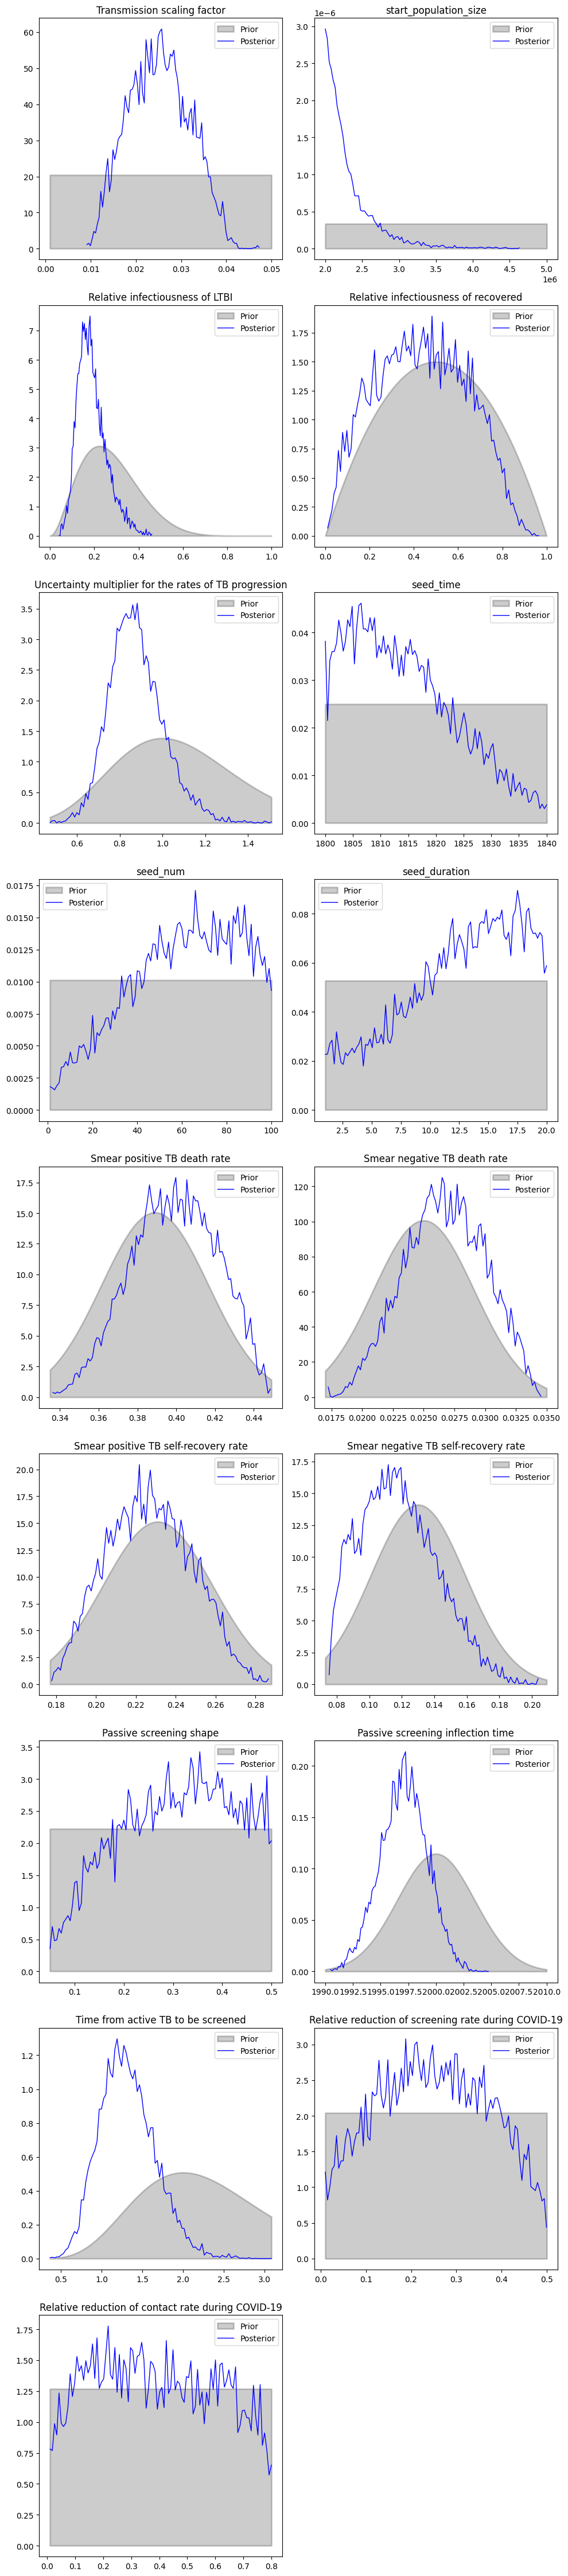

In [13]:
plot_post_prior_comparison(idata,priors, params_name)

In [14]:
tabulate_calib_results(idata, params_name)

Mean  \
Parameter                                                         
Transmission scaling factor                               0.025   
start_population_size                               2326202.034   
Relative infectiousness of LTBI                            0.19   
Relative infectiousness of recovered                      0.436   
Uncertainty multiplier for the rates of TB prog...        0.879   
seed_time                                              1814.363   
seed_num                                                 60.205   
seed_duration                                            12.513   
Smear positive TB death rate                              0.399   
Smear negative TB death rate                              0.027   
Smear positive TB self-recovery rate                      0.227   
Smear negative TB self-recovery rate                      0.118   
Passive screening shape                                   0.306   
Passive screening inflection time                      1997.084   
Time from active TB to be screened                        1.318   
Relative reduction of screening rate during COV...        0.249   
Relative reduction of contact rate during COVID-19        0.392   

                                                   Standard deviation  \
Parameter                                                               
Transmission scaling factor                                     0.007   
start_population_size                                       353132.76   
Relative infectiousness of LTBI                                 0.065   
Relative infectiousness of recovered                            0.203   
Uncertainty multiplier for the rates of TB prog...              0.126   
seed_time                                                       9.479   
seed_num                                                        24.25   
seed_duration                                                   4.915   
Smear positive TB death rate                                    0.022   
Smear negative TB death rate                                    0.003   
Smear positive TB self-recovery rate                            0.021   
Smear negative TB self-recovery rate                            0.023   
Passive screening shape                                         0.114   
Passive screening inflection time                               2.089   
Time from active TB to be screened                              0.335   
Relative reduction of screening rate during COV...              0.123   
Relative reduction of contact rate during COVID-19              0.216   

                                                   ESS bulk ESS tail  \
Parameter                                                              
Transmission scaling factor                            18.0     89.0   
start_population_size                                  57.0     85.0   
Relative infectiousness of LTBI                        30.0     74.0   
Relative infectiousness of recovered                   44.0    850.0   
Uncertainty multiplier for the rates of TB prog...    135.0   1321.0   
seed_time                                              96.0    866.0   
seed_num                                               66.0    323.0   
seed_duration                                          26.0    111.0   
Smear positive TB death rate                           37.0    150.0   
Smear negative TB death rate                           34.0    107.0   
Smear positive TB self-recovery rate                   42.0    178.0   
Smear negative TB self-recovery rate                   27.0    102.0   
Passive screening shape                                86.0   1328.0   
Passive screening inflection time                     914.0   1219.0   
Time from active TB to be screened                    204.0    313.0   
Relative reduction of screening rate during COV...     64.0    415.0   
Relative reduction of contact rate during COVID-19     39.0    201.0   

                            

In [15]:
plot_output_ranges(quantile_outputs,targets, ['case_notification_rate'], quantiles, 1, 1950, 2025)